# 의사결정트리 분류 복잡도 최적화

## #01. 준비작업

### [1] 패키지 가져오기

시각화를 위해서 `dtreeviz` 패키지가 필요하다

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

from sklearn.tree import DecisionTreeClassifier # 분석알고리즘
import dtreeviz
from sklearn.tree import export_text, plot_tree

from sklearn import tree
from collections import Counter
from itertools import chain, combinations


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계,머신러닝/E.InferentialStatistics/수업자료/breast-cancer-wisconsin.xlsx',index_col = 'id',categories=['diagnosis'])

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se 

In [5]:
df = my_labelling(origin,'diagnosis')

In [6]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='diagnosis', test_size=0.3, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

DecisionTreeClassifier의 random_state 설정됨
DecisionTreeClassifier {'criterion': ['gini', 'entropy']}
[교차검증 TOP5]
+----+-------------+-------------------+
|    | criterion   |   mean_test_score |
|----+-------------+-------------------|
|  0 | gini        |          0.919525 |
|  1 | entropy     |          0.917025 |
+----+-------------+-------------------+

[Best Params]
{'criterion': 'gini'}

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |      0.94152 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.939394 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율     

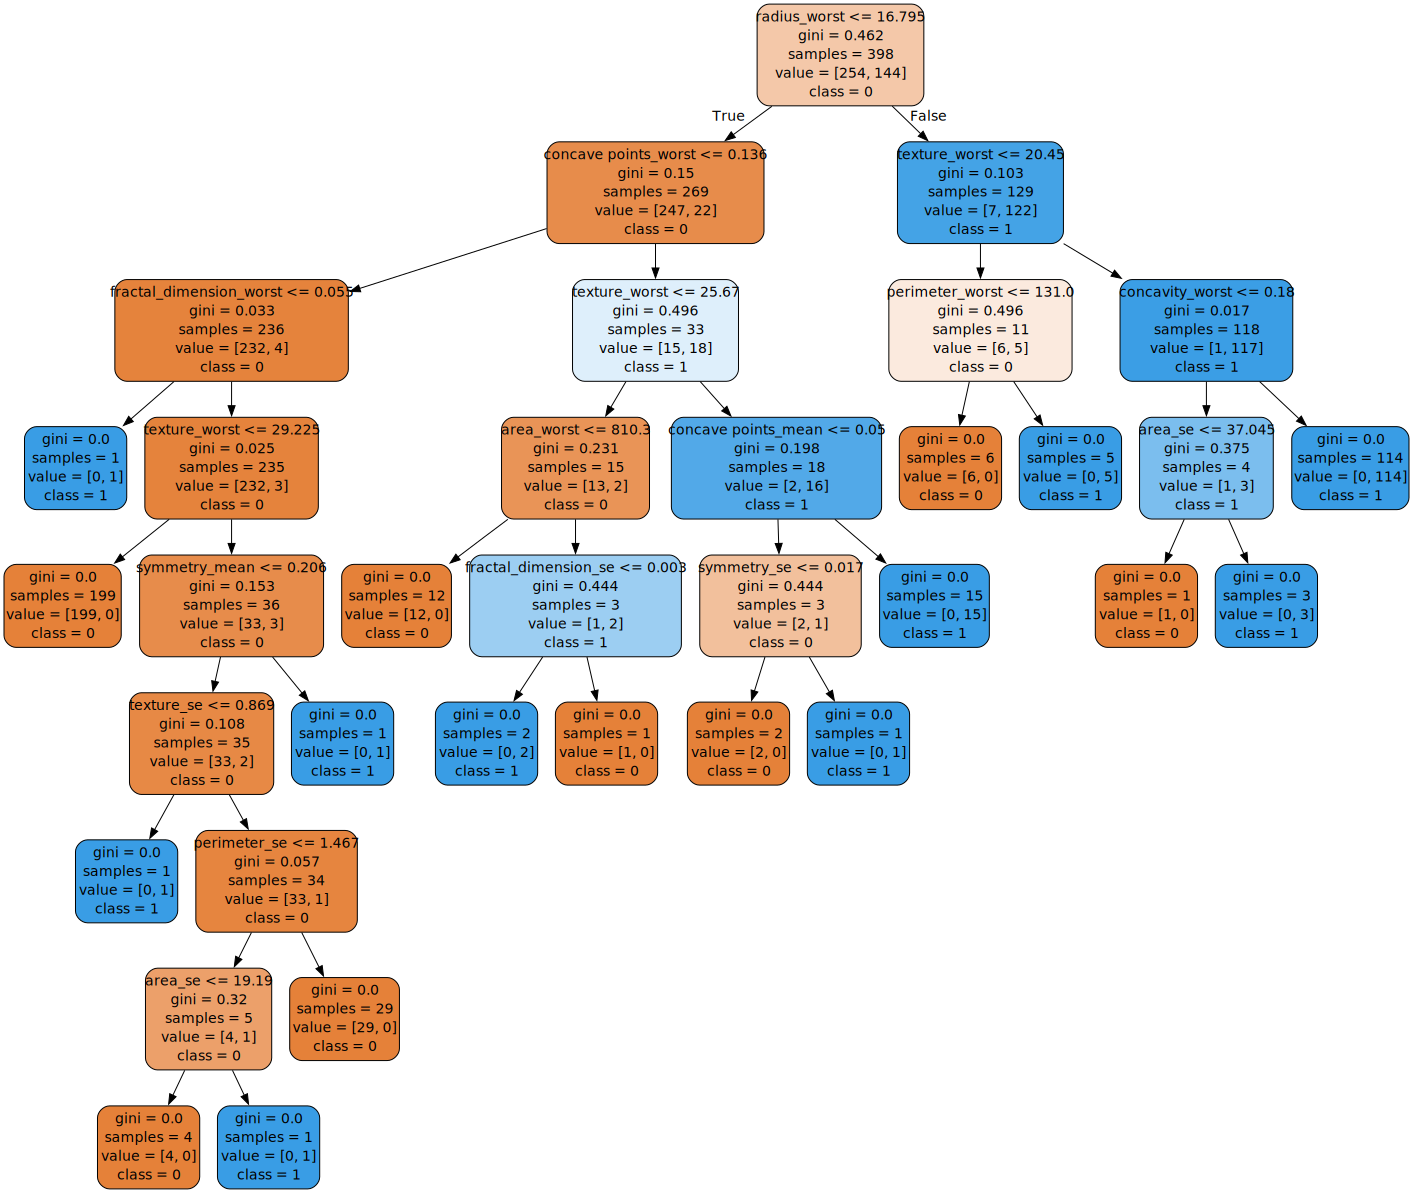

+----+------------+-------------------------+---------+
|    | 종속변수   | 독립변수                |     VIF |
|----+------------+-------------------------+---------|
|  0 | diagnosis  | radius_mean             | 87833.2 |
|  1 | diagnosis  | texture_mean            | 250.008 |
|  2 | diagnosis  | perimeter_mean          | 87440.5 |
|  3 | diagnosis  | area_mean               | 1701.19 |
|  4 | diagnosis  | smoothness_mean         | 592.508 |
|  5 | diagnosis  | compactness_mean        | 252.828 |
|  6 | diagnosis  | concavity_mean          | 250.447 |
|  7 | diagnosis  | concave points_mean     | 240.069 |
|  8 | diagnosis  | symmetry_mean           | 237.176 |
|  9 | diagnosis  | fractal_dimension_mean  | 933.259 |
| 10 | diagnosis  | radius_se               | 495.215 |
| 11 | diagnosis  | texture_se              |  21.102 |
| 12 | diagnosis  | perimeter_se            | 612.005 |
| 13 | diagnosis  | area_se                 | 127.417 |
| 14 | diagnosis  | smoothness_se           |  48.682 |


In [7]:
cv_estimator = my_dtree_classification(x_train,y_train,x_test,y_test,
                                       hist=False, roc=False, pr=False,
                                       conf_matrix=False, learning_curve=False)

## #03. Pruning (가지치기)

dtree 분류기 객체의 `cost_complexity_pruning_path()`메서드는 각 과정마다 효과적인 불순도와 이를 위한 알파값을 반환한다.

### [1] 알파값, 불순도 구하기

In [8]:
dtree= DecisionTreeClassifier(random_state=777)
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

[0.         0.00243866 0.00249127 0.0033352  0.00335008 0.00335008
 0.00487689 0.00536013 0.00558347 0.01370489 0.01457968 0.02347089
 0.04063679 0.32702814] [0.         0.00487733 0.00985987 0.01986547 0.02321555 0.02656563
 0.03144252 0.03680266 0.04238613 0.05609102 0.0706707  0.09414159
 0.13477838 0.46180652]


### [2] 알파값, 불순도 시각화

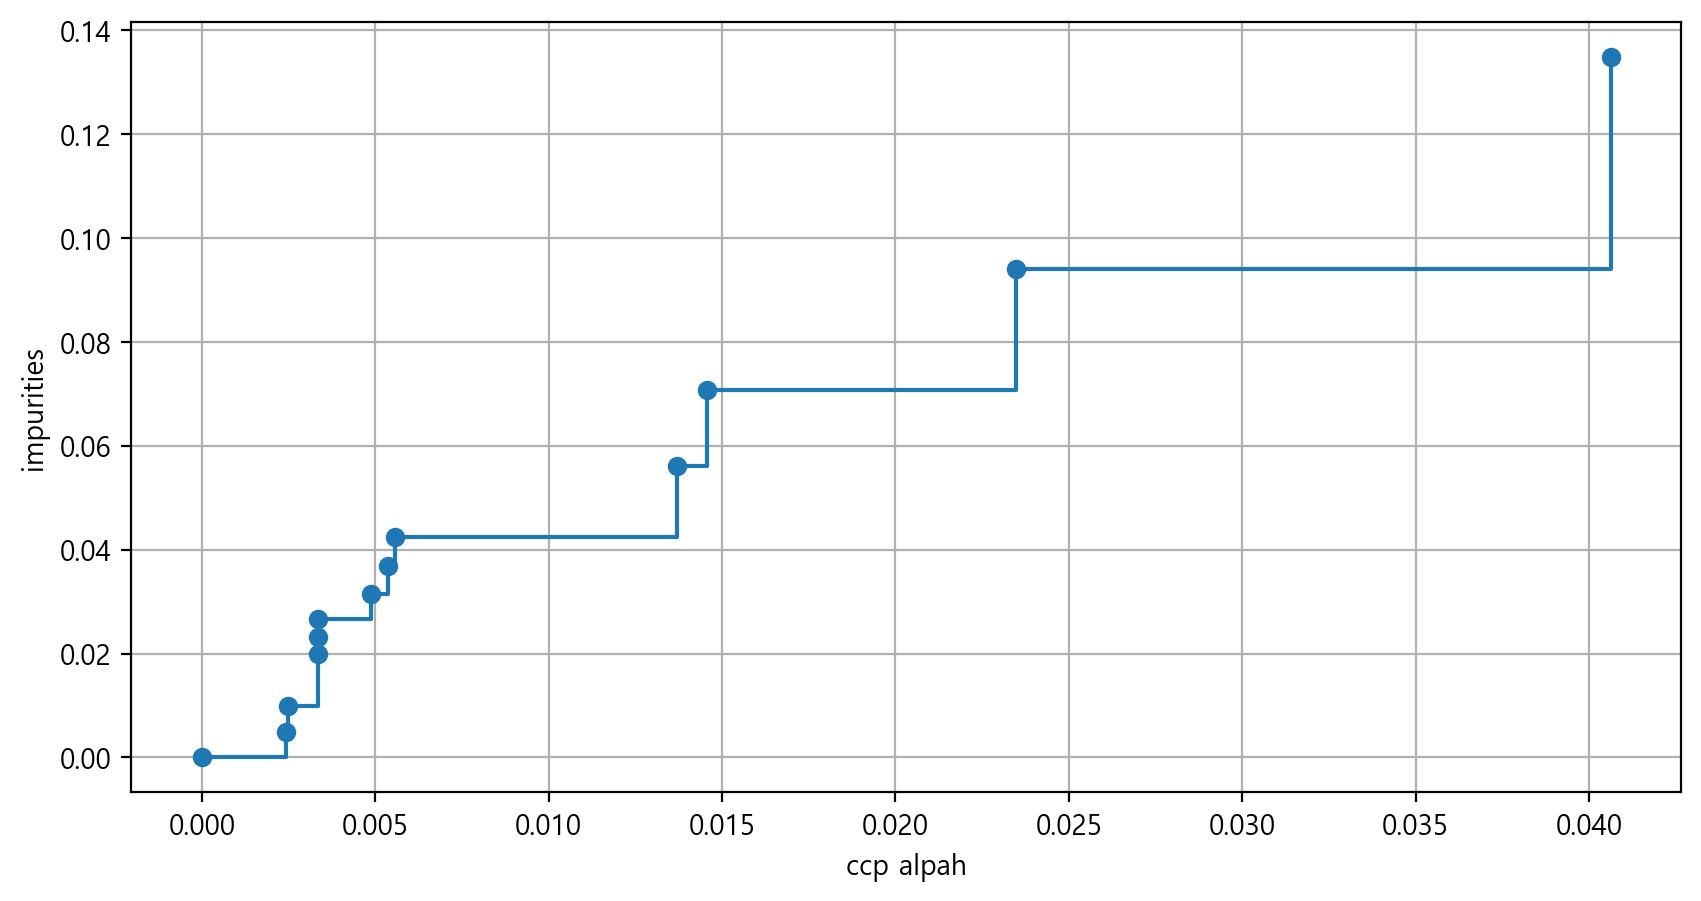

In [9]:
fig = plt.figure(figsize= (10,5), dpi=200)
ax = fig.gca()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('ccp alpah')
ax.set_ylabel('impurities')
ax.grid()
plt.show()
plt.close()

> 알파값이 커질수록 불순도가 높아진다. 그러므로 최적의 정확도와 가장 낮은 알파값을 동시에 충족하는 모형을 찾아야 한다.

### [3] 알파값을 적용한 DTree 객체 생성후 노드의 수 확인

In [10]:
# 의미 없는 양 끝 값 제외하고 알파값 목록 생성
ccp_alphas = ccp_alphas[1:-1]
estimator_list = []

for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=777, ccp_alpha=ccp_alpha)
    dtree.fit(x_train,y_train)
    
    # 분류기 객체를 리스트에 담기
    estimator_list.append(dtree)
    
    # 각 분류기에 따른 트리의 노드 수 확인
t_nodes = [e.tree_.node_count for e in estimator_list]
t_nodes

[31, 27, 21, 17, 17, 15, 13, 11, 9, 7, 5, 3]

> 알파값에 의해 노드 수가 점차 줄어듬, 노드 수가 지나치게 작을 경우 정확도 떨어짐

In [11]:
estimator_list

[DecisionTreeClassifier(ccp_alpha=0.002438663907774164, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.002491269908866359, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.0033351991496908934, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.003350083752093802, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.003350083752093802, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.004876890764678041, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.005360134003350085, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.005583472920156337, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.013704888076747374, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.014579682853056032, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.023470889802548092, random_state=777),
 DecisionTreeClassifier(ccp_alpha=0.040636793581784396, random_state=777)]

### [4] 알파값에 따른 의사결정트리 비교

[node_size: 31, ccp_alpha: 0.0024 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |      0.94152 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.939394 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.038835 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.961165 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.925373 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.931325 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+-------------------------

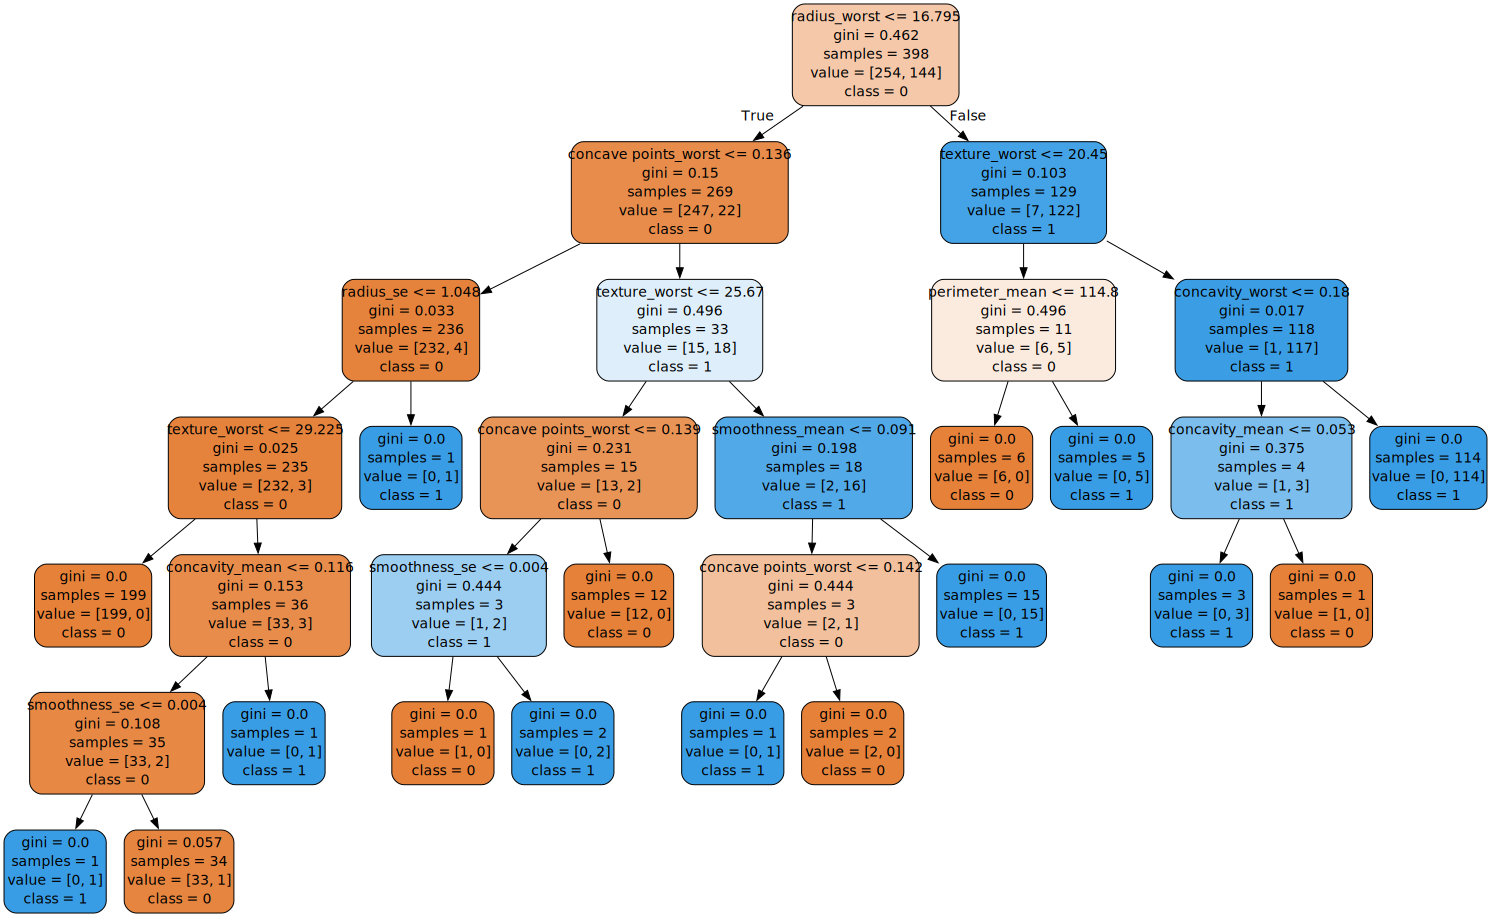












[node_size: 27, ccp_alpha: 0.0025 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |      0.94152 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.939394 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.038835 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.961165 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.925373 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.920617 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

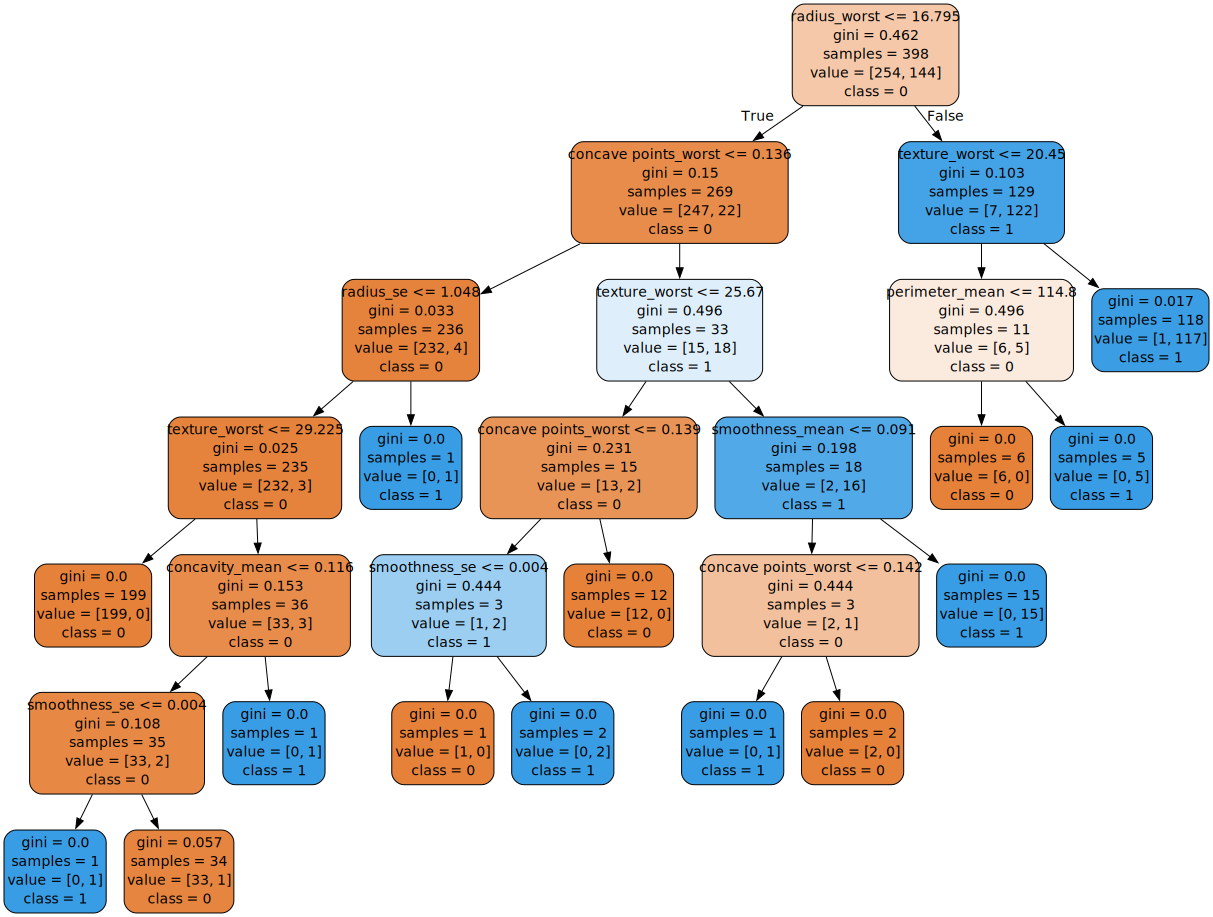












[node_size: 21, ccp_alpha: 0.0033 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.96875 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.939394 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.909123 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

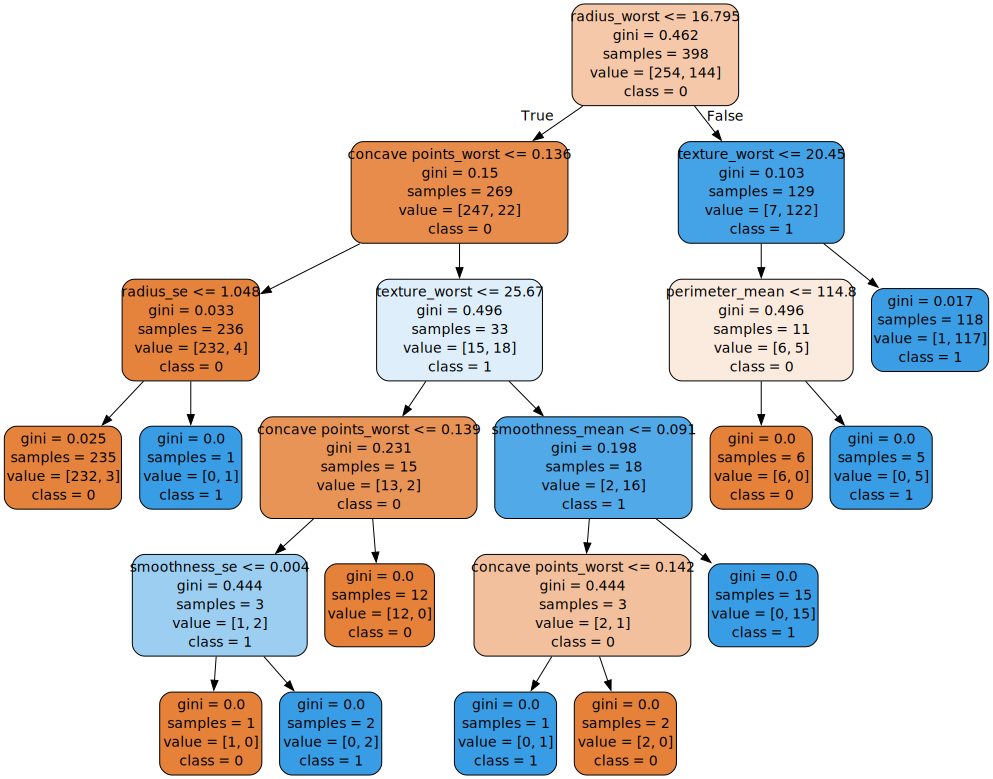












[node_size: 17, ccp_alpha: 0.0034 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.96875 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.939394 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.909123 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

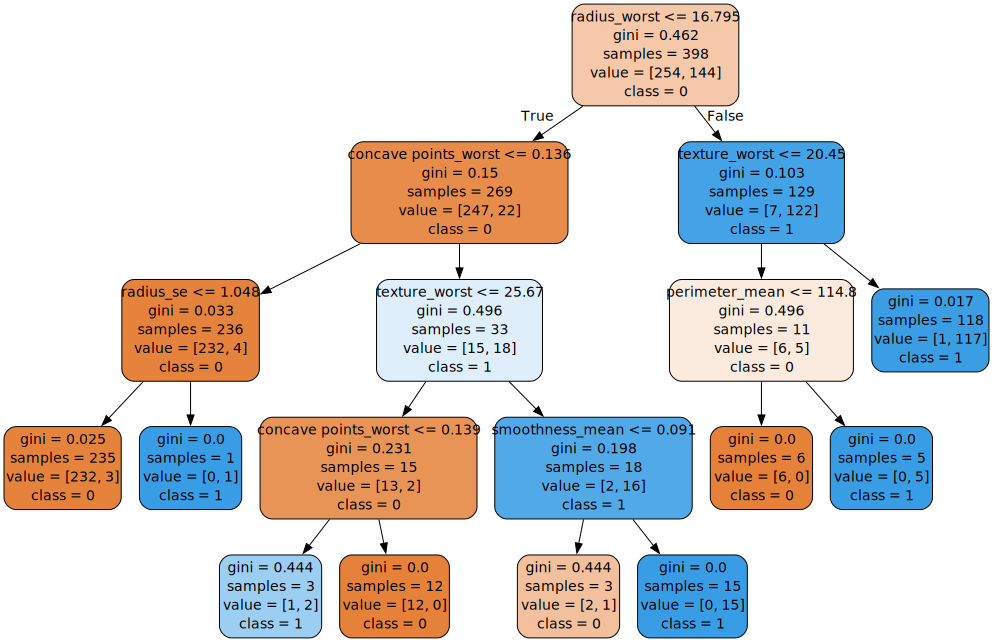












[node_size: 17, ccp_alpha: 0.0034 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.96875 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.939394 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.909123 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

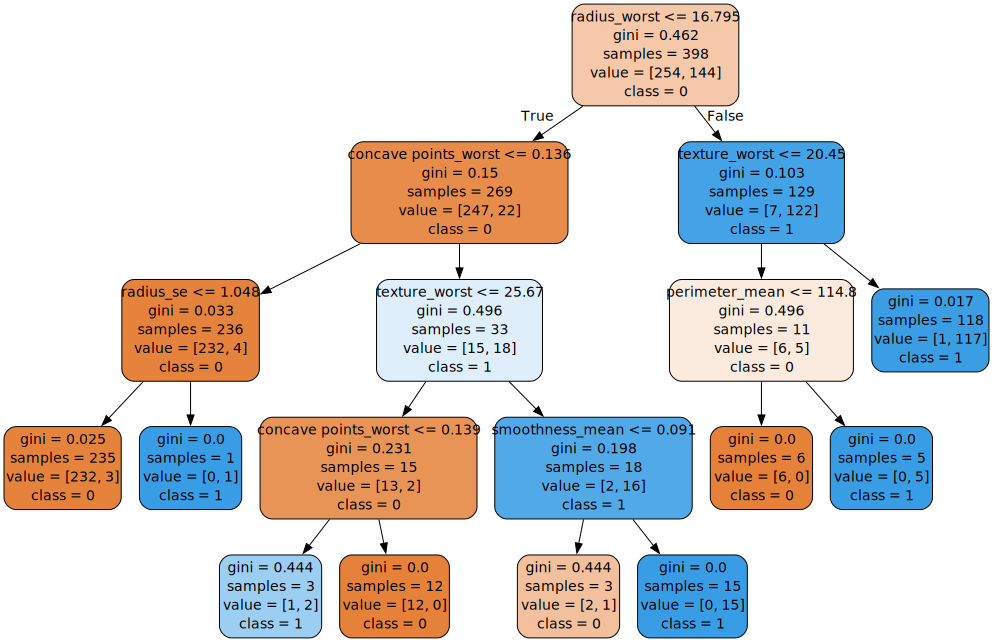












[node_size: 15, ccp_alpha: 0.0049 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.96875 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.939394 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.909123 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

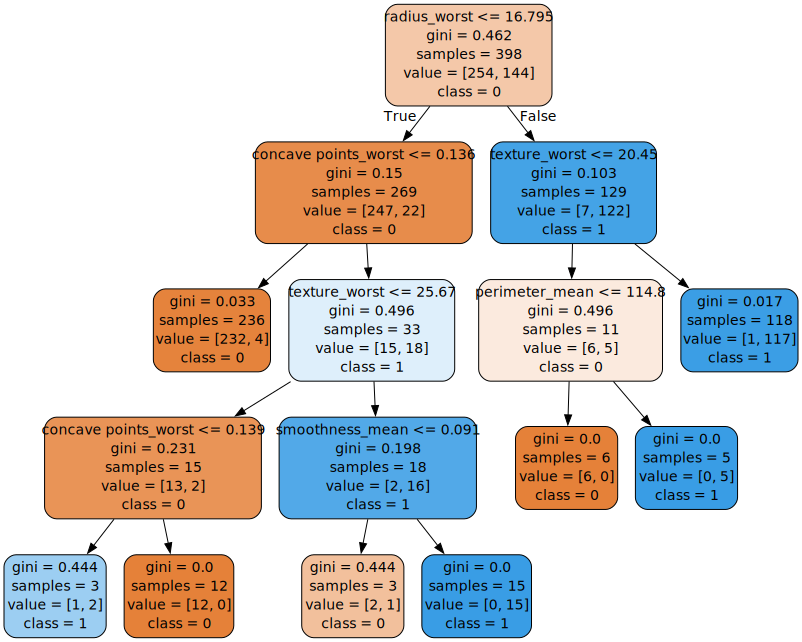












[node_size: 13, ccp_alpha: 0.0054 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.96875 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.939394 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.936251 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

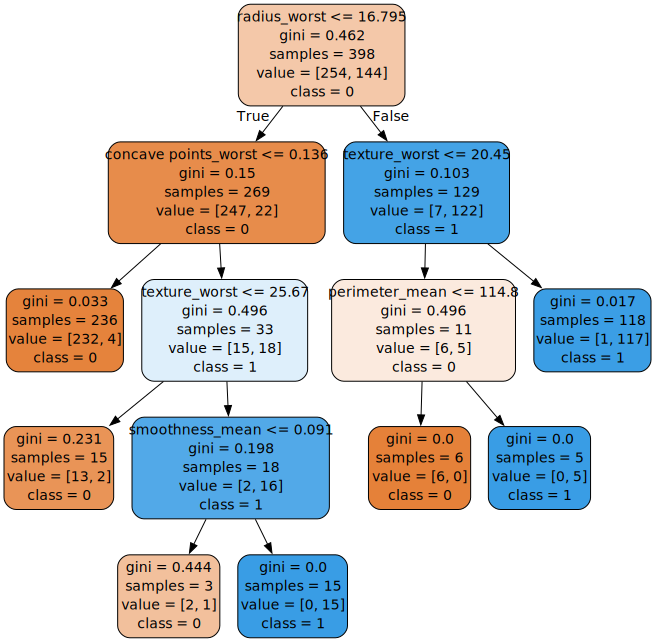












[node_size: 11, ccp_alpha: 0.0056 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.96875 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.939394 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.942747 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

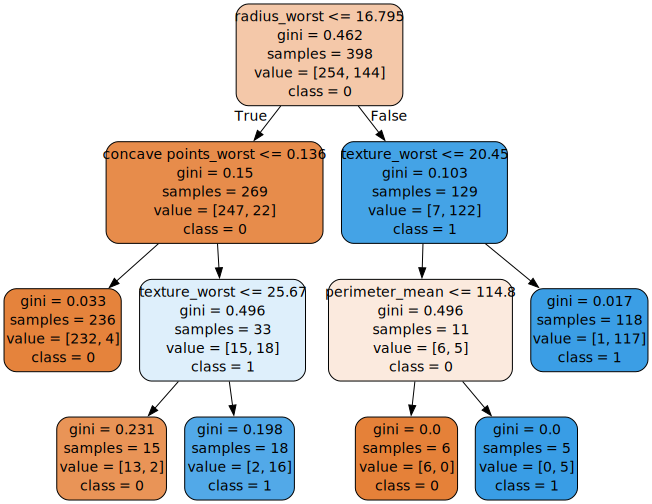












[node_size: 9, ccp_alpha: 0.0137 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.947368 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.968254 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.897059 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0194175 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.980583 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.931298 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.982938 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+---------------

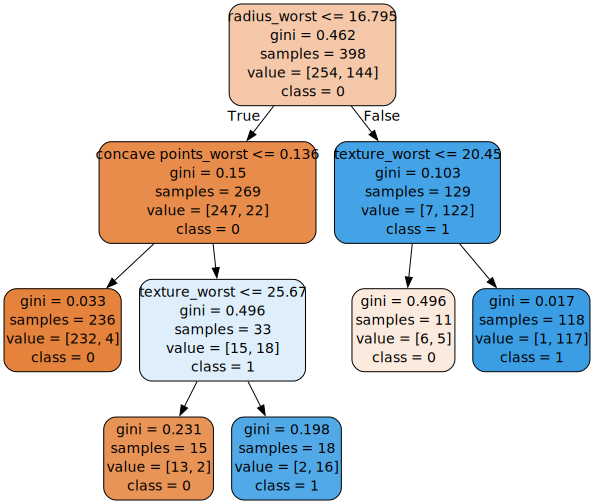












[node_size: 7, ccp_alpha: 0.0146 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.928571 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.955882 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0485437 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.951456 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.942029 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.969018 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+---------------

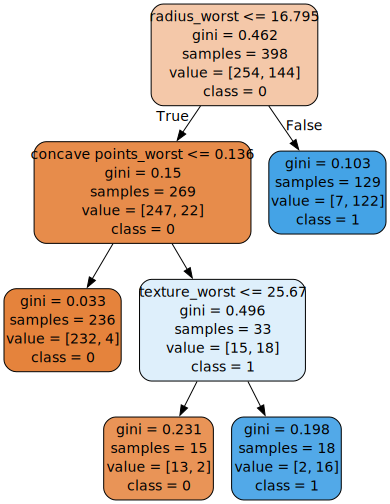












[node_size: 5, ccp_alpha: 0.0235 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.953216 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.905405 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.985294 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0679612 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.932039 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.943662 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.968018 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+---------------

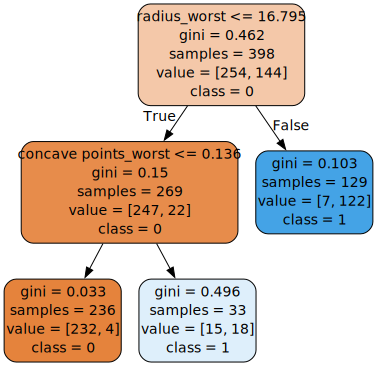












[node_size: 3, ccp_alpha: 0.0406 ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.912281 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.934426 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.838235 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.038835 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.961165 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.883721 | 정밀도와 재현율의 조화평균                                |
| AUC               |       0.8997 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+---------------

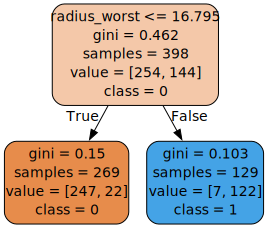

In [12]:
for i, v in enumerate(estimator_list):
    print('[node_size: {0}, ccp_alpha: {1:.4f}'.format(v.tree_.node_count, ccp_alphas[i]), "="* 50, "\n")
    my_classification_result(v, x_test, y_test, hist=False, roc=False, pr=False, conf_matrix=False, learning_curve=False)
    print('\n' * 10)

### [5] 알파값에 따른 성능 변화

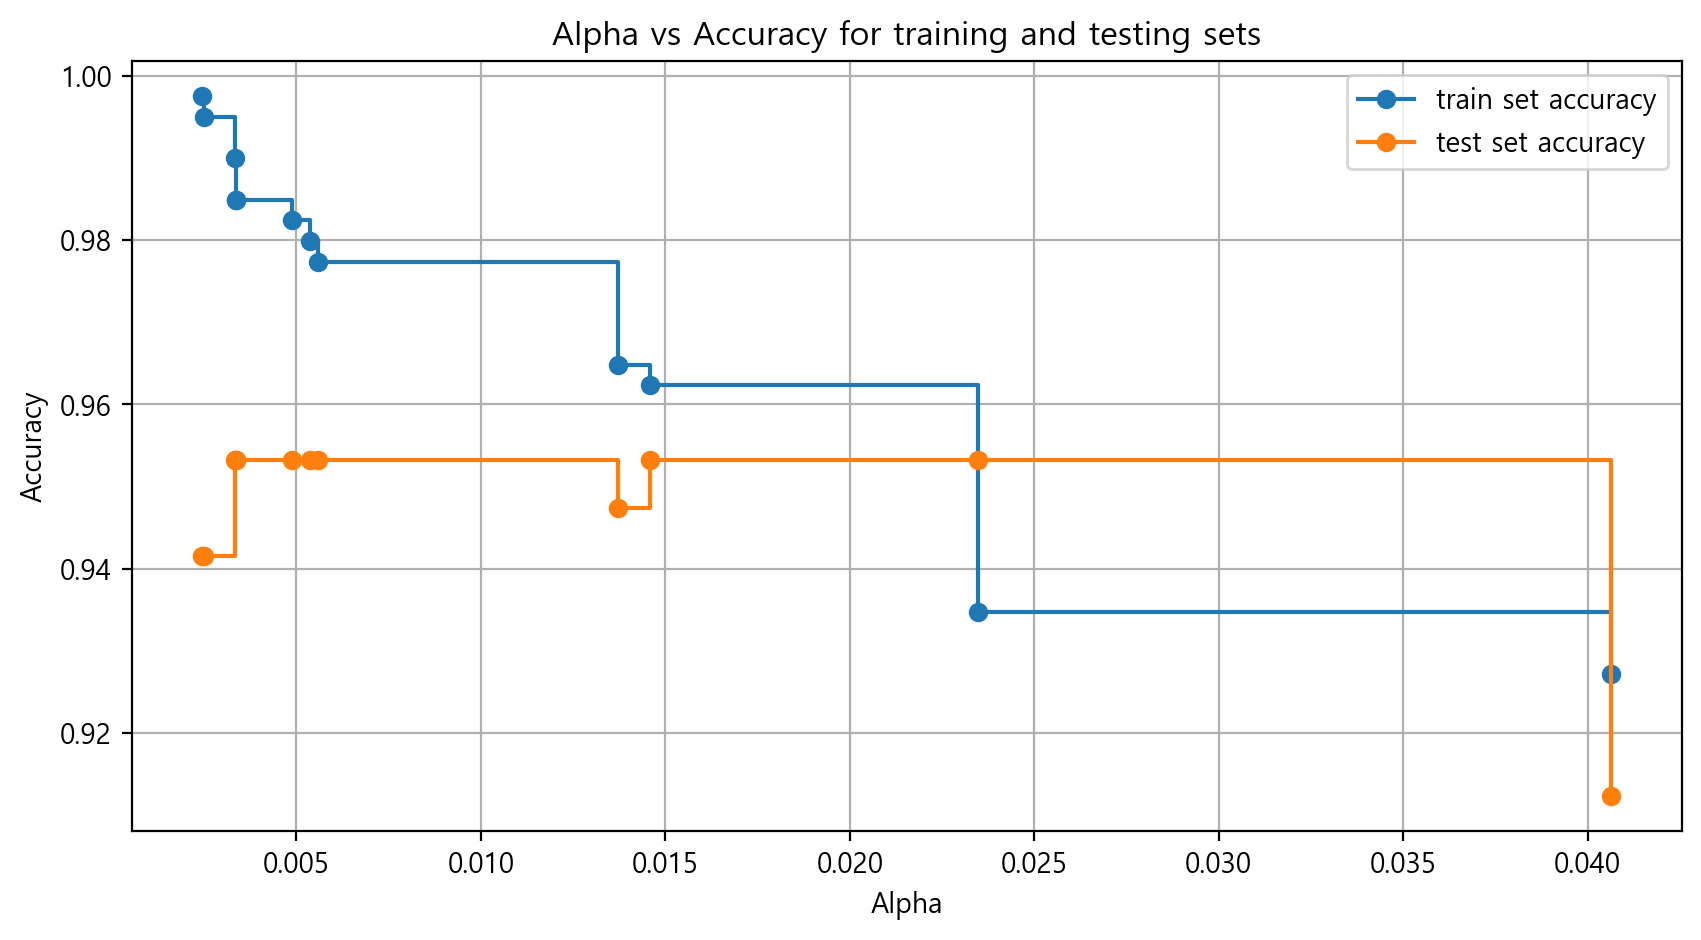

In [13]:
train_scores = []
test_scores = []

for v in estimator_list:
    train_scores.append(v.score(x_train, y_train))
    test_scores.append(v.score(x_test, y_test))


fig = plt.figure(figsize=(10,5), dpi=200)
ax = fig.gca()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Alpha vs Accuracy for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train set accuracy', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test set accuracy', drawstyle='steps-post')
ax.legend()
ax.grid()
plt.show()
plt.close()
    





### [6] 검증데이터에 대한 스코어에 따른 알파값

In [14]:
df = DataFrame({'test acc': test_scores, 'alpha': ccp_alphas})
df.sort_values(['test acc', 'alpha'], ascending=[False, True], inplace=True)
df.reset_index(drop=True, inplace=True)
my_pretty_table(df)

+----+------------+------------+
|    |   test acc |      alpha |
|----+------------+------------|
|  0 |   0.953216 |  0.0033352 |
|  1 |   0.953216 | 0.00335008 |
|  2 |   0.953216 | 0.00335008 |
|  3 |   0.953216 | 0.00487689 |
|  4 |   0.953216 | 0.00536013 |
|  5 |   0.953216 | 0.00558347 |
|  6 |   0.953216 |  0.0145797 |
|  7 |   0.953216 |  0.0234709 |
|  8 |   0.947368 |  0.0137049 |
|  9 |    0.94152 | 0.00243866 |
| 10 |    0.94152 | 0.00249127 |
| 11 |   0.912281 |  0.0406368 |
+----+------------+------------+


In [15]:
"최적의 알파값:", df['alpha'][0]

('최적의 알파값:', 0.0033351991496908934)

### [7] 알파값을 적용한 새로운 분석 모형

depth: 5 leaves: 11


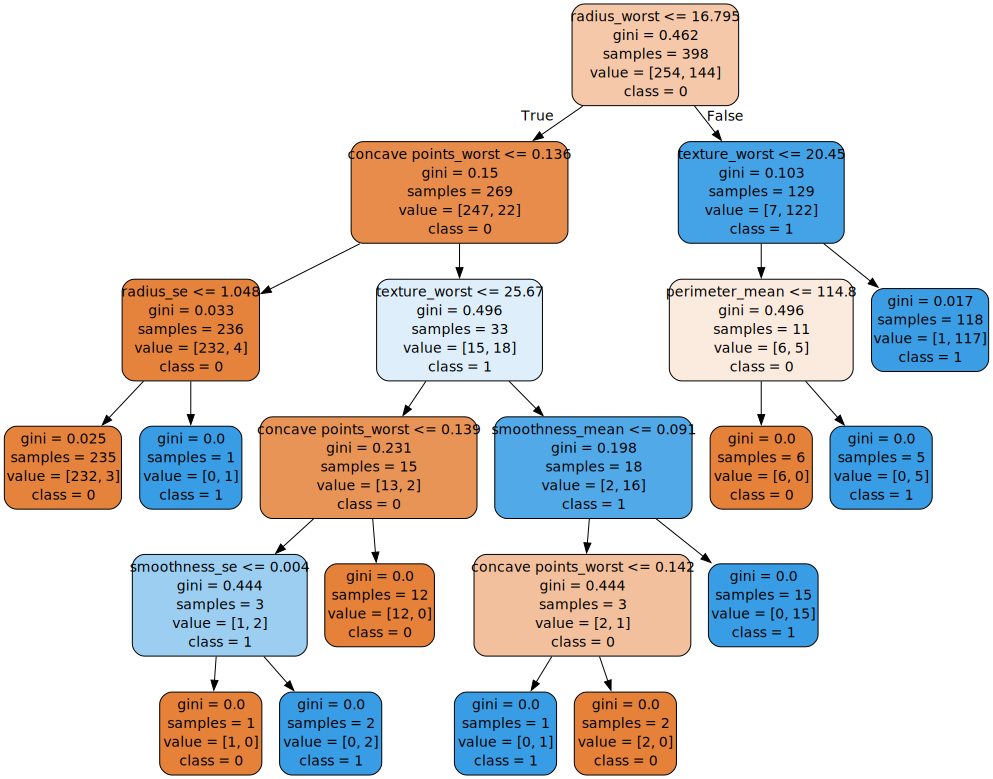

In [16]:
final_estimator = DecisionTreeClassifier(criterion='gini', random_state=777, ccp_alpha=df['alpha'][0])
final_estimator.fit(x_train, y_train)
my_tree(final_estimator)
                                                                                    

In [17]:
estimator = DecisionTreeClassifier(random_state = 123)
estimator.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

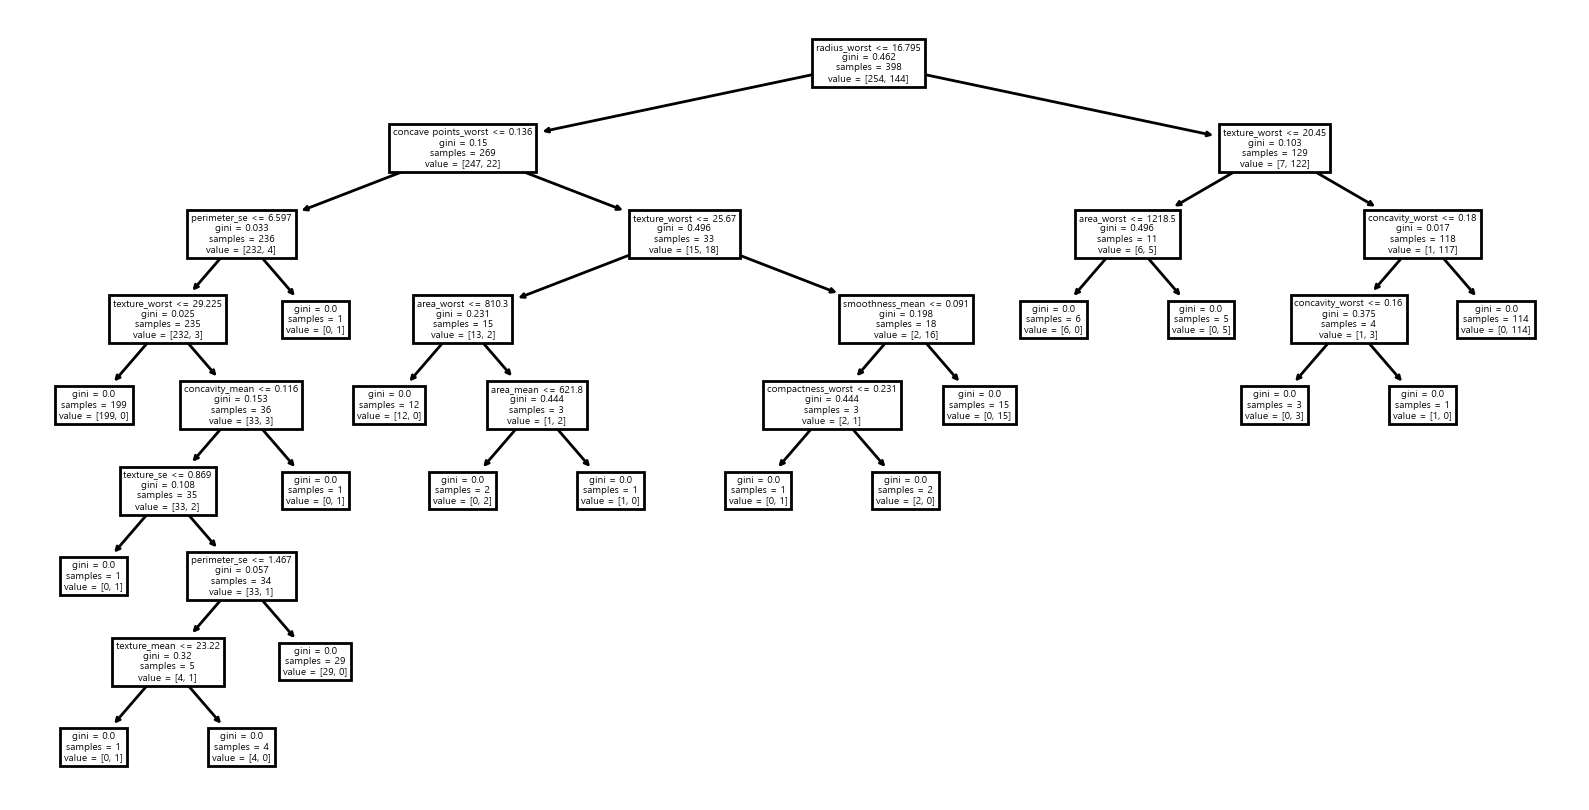

In [18]:
plt.figure(figsize=(10,5))
plot_tree(estimator, feature_names=list(x_train.columns))
plt.show()
plt.close()

DecisionTreeClassifier의 random_state 설정됨
DecisionTreeClassifier {'criterion': ['gini', 'entropy']}
[교차검증 TOP5]
+----+-------------+-------------------+
|    | criterion   |   mean_test_score |
|----+-------------+-------------------|
|  0 | gini        |          0.919525 |
|  1 | entropy     |          0.917025 |
+----+-------------+-------------------+

[Best Params]
{'criterion': 'gini'}

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |      0.94152 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.939394 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |     0.911765 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율     

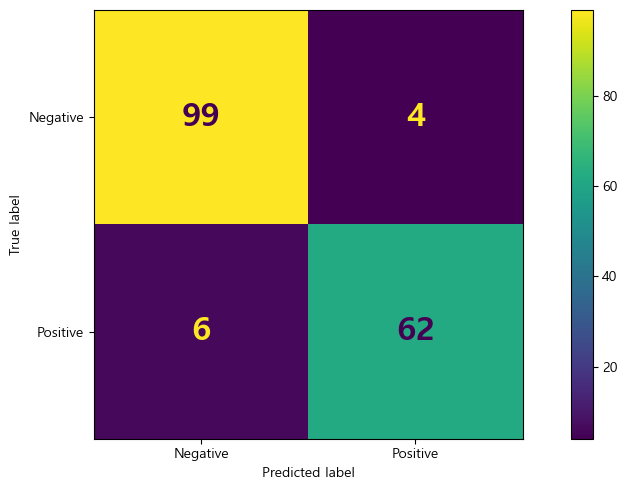

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


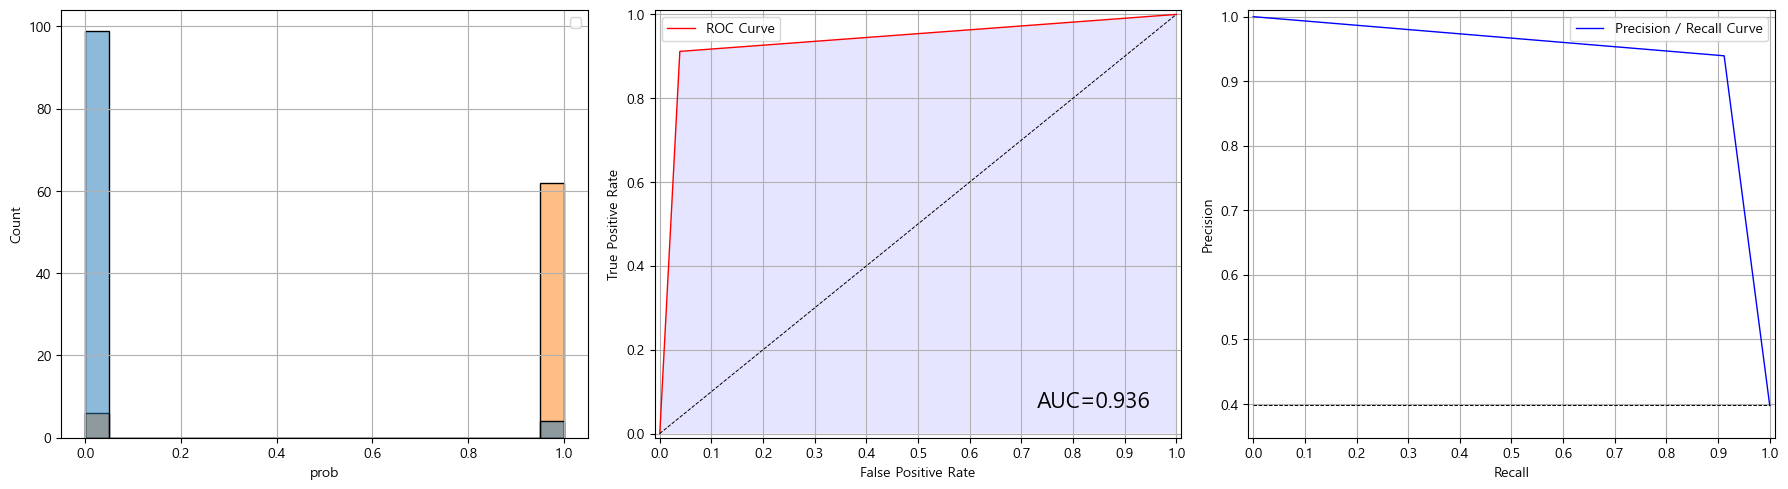


[학습곡선]


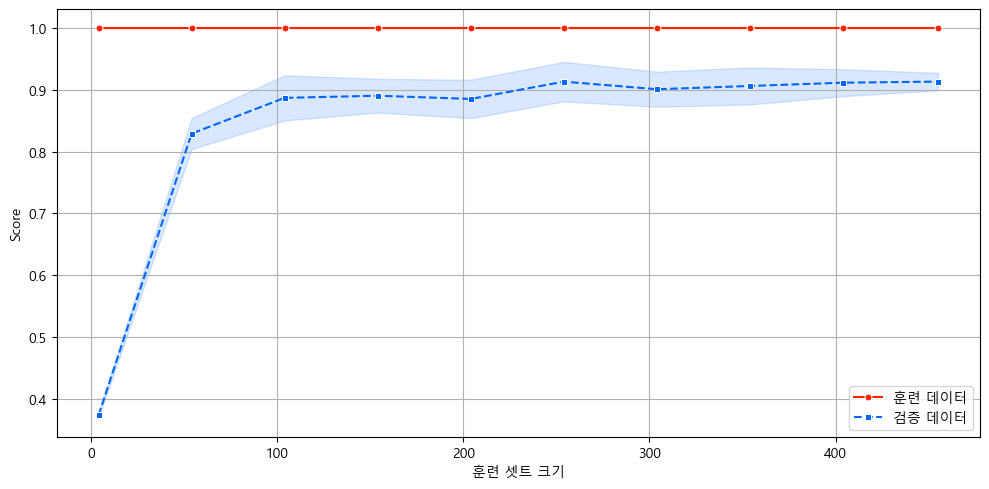

depth: 8 leaves: 18


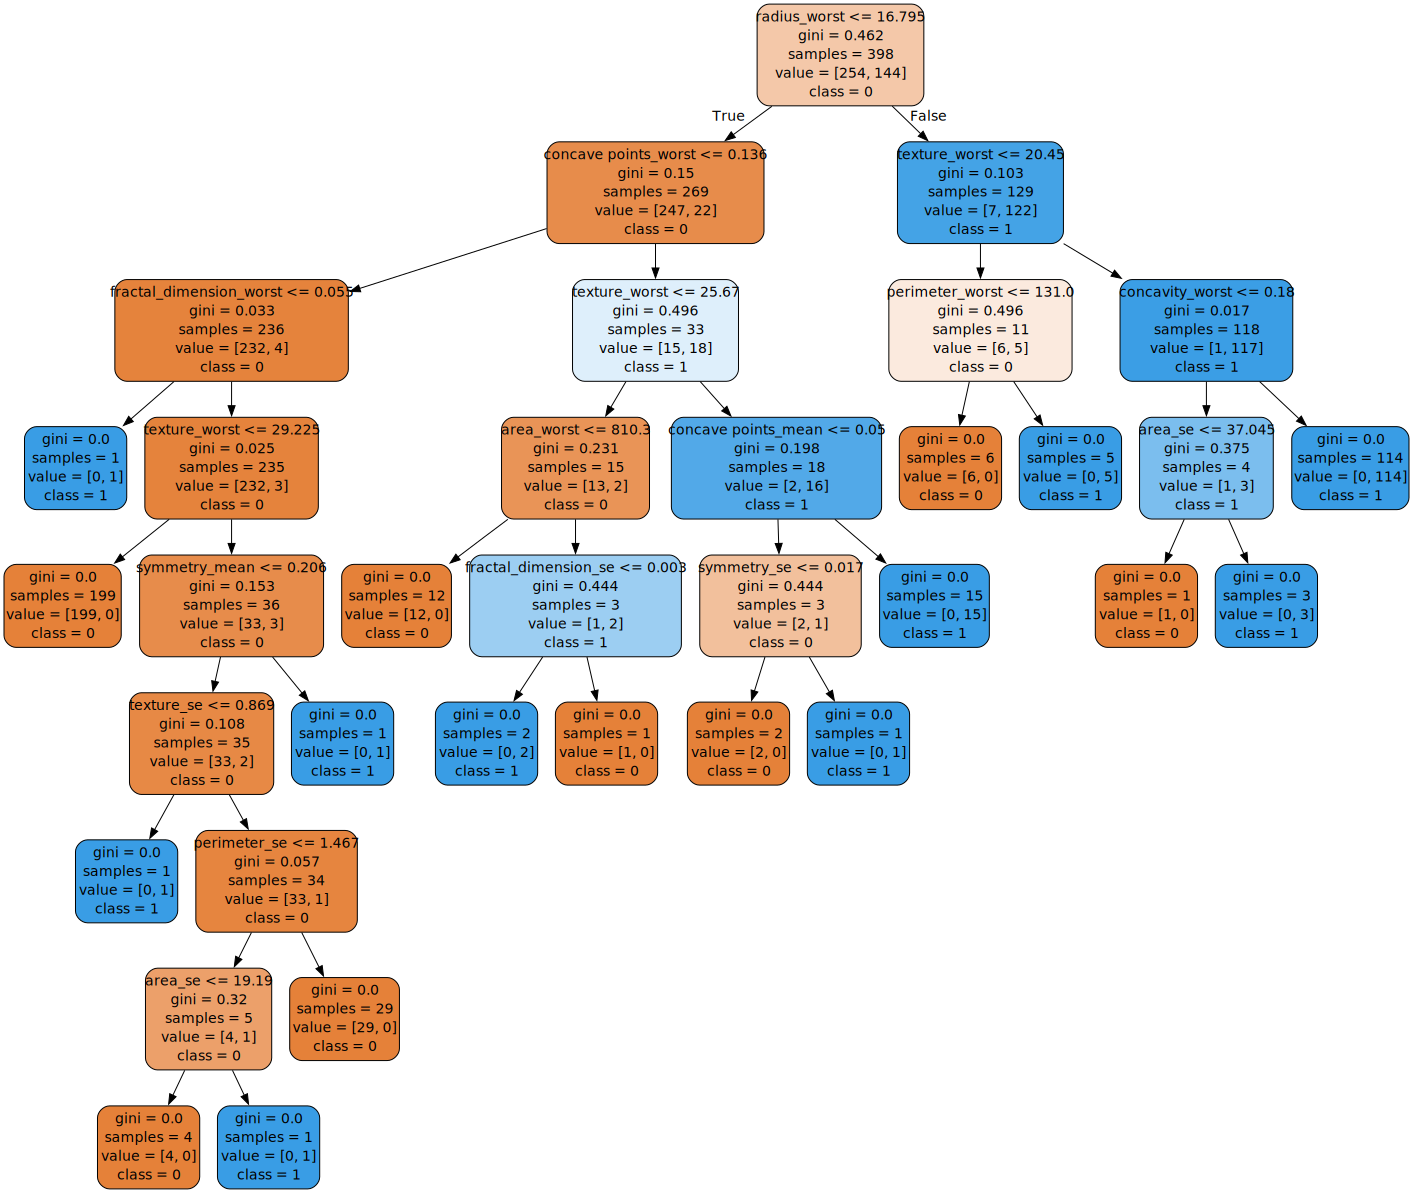

+----+------------+-------------------------+---------+
|    | 종속변수   | 독립변수                |     VIF |
|----+------------+-------------------------+---------|
|  0 | diagnosis  | radius_mean             | 87833.2 |
|  1 | diagnosis  | texture_mean            | 250.008 |
|  2 | diagnosis  | perimeter_mean          | 87440.5 |
|  3 | diagnosis  | area_mean               | 1701.19 |
|  4 | diagnosis  | smoothness_mean         | 592.508 |
|  5 | diagnosis  | compactness_mean        | 252.828 |
|  6 | diagnosis  | concavity_mean          | 250.447 |
|  7 | diagnosis  | concave points_mean     | 240.069 |
|  8 | diagnosis  | symmetry_mean           | 237.176 |
|  9 | diagnosis  | fractal_dimension_mean  | 933.259 |
| 10 | diagnosis  | radius_se               | 495.215 |
| 11 | diagnosis  | texture_se              |  21.102 |
| 12 | diagnosis  | perimeter_se            | 612.005 |
| 13 | diagnosis  | area_se                 | 127.417 |
| 14 | diagnosis  | smoothness_se           |  48.682 |


DecisionTreeClassifier(random_state=1234)

In [19]:
my_dtree_classification(x_train,y_train,x_test,y_test)

In [20]:
my_classification(x_train,y_train,x_test,y_test)

LogisticRegression의 n_jobs 설정됨
LogisticRegression의 random_state 설정됨
LogisticRegression {}
KNeighborsClassifier의 n_jobs 설정됨
KNeighborsClassifier {}
SVC의 n_jobs 설정됨
SVC의 random_state 설정됨
SVC {}
GaussianNB {}
DecisionTreeClassifier의 random_state 설정됨
DecisionTreeClassifier {'criterion': ['gini', 'entropy']}
SGDClassifier의 n_jobs 설정됨
SGDClassifier의 random_state 설정됨
SGDClassifier의 early_stopping 설정됨
SGDClassifier {}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                        |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB             |                         0 |           0.9590

{'GaussianNB': GaussianNB(),
 'SVC': SVC(n_jobs=-1, random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(n_jobs=-1),
 'SGDClassifier': SGDClassifier(early_stopping=True, n_jobs=-1, random_state=1234),
 'LogisticRegression': LogisticRegression(n_jobs=1, random_state=1234)}